<div class="alert alert-block alert-info">
    <br><font face = "Times New Roman" size = "6"><b><center>PROYECTO FINAL</center></b></font>
    <br><font face = "Times New Roman" size = "5"><b><center>Asignatura: Ing. de Características - Maestría en Informática Aplicada</center></b></font>
    <br><font face = "Times New Roman" size = "4"><center>Profesor: Mtro. Gaddiel Desirena López</center></font>
    <font face = "Times New Roman" size = "4"><center>Alumnos:</center></font>
    <font face = "Times New Roman" size = "4"><center>Vanessa Suárez Blanco</center></font>
    <font face = "Times New Roman" size = "4"><center>Pedro Ibarra González</center></font>
        <font face = "Times New Roman" size = "4"><center>09 de Mayo de 2024</center></font>
</div>

Actualmente, con los avances en las tecnologías de la información, la generación de datos de diversos tipos en un solo día tiene volúmenes muy altos y con tendencia creciente. Con el fin del aprovechamiento de la información valiosa que pueda estar oculta en los datos que se generan, se requieren tener conocimientos básicos de manejo de información, ingeniería de características y de análisis exploratorio de datos.

De forma general, a menos que la persona sea una experta en el fenómeno en el cual se están generando los datos, el ingeniero que se disponga al análisis de los datos generados debe de realizar un análisis exploratorio para rescatar las características básicas que poseen los datos


El objetivo del proyecto final es realizar un Análisis Exploratorio de Datos (EDA) a la base de datos asignada o elegida por el equipo y realizar las siguientes actividades:


**1.- Aplicar las técnicas y algoritmos vistos en los tres parciales del curso:**

-  1.1. Identificación de datos
-  1.2. Tratamiento de datos faltantes 
-  1.3. Codificación de variables categóricas 
-  1.4. Transformación de variables numéricas
-  1.5. Escalamiento de variables 
-  1.6. Discretización de variables


**2.- Del dataframe obtenido realizar una clusterización mediante los algoritmos**
-  Kmeans++
-  Arboles de decisión
-  Clustering jerárquico. 

Obtenga gráficas y comentarios de sus resultados.


**3.- Finalmente, del conjunto de datos, identificar la o las variables de salida y las variables de entrada para entrenar algún algoritmo de ML (Arboles de desición, Regresiones lineales, etc… ), se requiere obtener un accuracy arriba del 80%, si el accuracy está por debajo de este valor, entonces será necesario repetir el punto 1.**

In [1]:
#Borrar después
#Entregables:

#• Presentación con diapositivas

#• Reporte que valide la realización del proyecto.

#• Código en Jupyter notebook del proceso del proyecto, analíticas, comentarios y gráficas

El conjunto de datos de LinkedIn proporcionado contiene **7,927 filas y 15 columnas**, ofreciendo una visión general completa de las ofertas de empleo en la plataforma. 

Los datos se pueden utilizar para análisis de datos, visualización e investigación. Las ofertas de empleo incluyen roles de Analista de Datos, Ingeniero de Aprendizaje Automático, Servicios de TI y Consultoría de TI, ubicados en diversos lugares del mundo, con salarios y horarios de trabajo variados. 

El conjunto de datos incluye información sobre la empresa, las responsabilidades del rol y las habilidades requeridas para cada empleo. Este conjunto de datos es un recurso valioso para comprender las oportunidades laborales en diferentes industrias y ubicaciones.

Descripciones de las columnas:
- **job_ID**: Identificador único para cada oferta de empleo.
- **job**: El título de la oferta de empleo.
- **location**: La ubicación de la oferta de empleo.
- **company_id**: El identificador único de la empresa que ofrece el empleo.
- **company_name**: El nombre de la empresa que ofrece el empleo.
- **work_type**: El tipo de trabajo ofrecido (por ejemplo, tiempo completo, tiempo parcial, etc.).
- **full_time_remote**: Indica si el empleo es una posición remota a tiempo completo.
- **no_of_employ**: El número de empleados en la empresa que ofrece el empleo.
- **no_of_application**: El número de solicitudes recibidas para el empleo.
- **posted_day_ago**: El número de días desde que se publicó el empleo.
- **alumni**: Indica si la oferta de empleo es para exalumnos de una determinada organización.
- **Hiring_person**: El nombre de la persona responsable de contratar para el empleo.
- **linkedin_followers**: El número de seguidores en LinkedIn de la persona que contrata.
- **hiring_person_link**: Un enlace al perfil de LinkedIn de la persona que contrata.
- **job_details**: Información detallada sobre el empleo, incluyendo responsabilidades y requisitos.

## 1.- Aplicar las técnicas y algoritmos vistos en los tres parciales del curso:

### 1.1. Identificación de datos

#### Variables Binarias
alumni_binary: Indica la presencia (1) o ausencia (0) de exalumnos, derivado de la columna alumni.

#### Variables Nominales
-  job: El título de la oferta de empleo.
-  location: Ubicación de la oferta de empleo.
-  company_name: Nombre de la empresa que ofrece el empleo.
-  work_type: Tipo de trabajo ofrecido (e.g., tiempo completo, tiempo parcial).
-  full_time_remote: Indica si el empleo es a tiempo completo y remoto o no.

#### Variables Ordinales
-  full_time_remote: Podría considerarse ordinal si las categorías implican un orden de tipo de contrato o nivel de senioridad (e.g., Asociado vs. Nivel Senior).

#### Variables Numéricas
-  job_ID: Identificador único para cada oferta de empleo.
-  no_of_application: Número de aplicaciones.

In [2]:
# Importar Librerias de toda la tarea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from fuzzywuzzy import process
import re

In [3]:
# Cargamos el df de LinkedIn desde un archivo CSV
df = pd.read_csv('./linkedin.csv')

# Mostramos las pirmeras linas para familiarizarnos los datos
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

In [5]:
valores_unicos = df.nunique()

# Mostrar el número de valores únicos para cada columna
print(valores_unicos)

job_ID                5843
job                   2991
location               151
company_id               0
company_name          2495
work_type                3
full_time_remote        23
no_of_employ           269
no_of_application      202
posted_day_ago          91
alumni                 191
Hiring_person         2823
linkedin_followers    3935
hiring_person_link    2845
job_details           4563
Column1                  0
dtype: int64


**Se ha detectado que la variable job_ID contiene valores duplicados.** Aunque el conjunto de datos tiene cerca de 8 mil filas, solo hay 5843 valores únicos de job_ID. Por lo tanto, vamos a eliminar las filas duplicadas para asegurar la integridad del análisis.

In [6]:
# Eliminar filas donde 'job_id' está duplicado, manteniendo la primera ocurrencia
df = df.drop_duplicates(subset='job_ID', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5843 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5843 non-null   int64  
 1   job                 5816 non-null   object 
 2   location            5816 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        5815 non-null   object 
 5   work_type           5711 non-null   object 
 6   full_time_remote    5776 non-null   object 
 7   no_of_employ        5614 non-null   object 
 8   no_of_application   5810 non-null   object 
 9   posted_day_ago      5837 non-null   object 
 10  alumni              3586 non-null   object 
 11  Hiring_person       4157 non-null   object 
 12  linkedin_followers  3530 non-null   object 
 13  hiring_person_link  4157 non-null   object 
 14  job_details         5805 non-null   object 
 15  Column1             0 non-null      float64
dtypes: float64(

Se observa el tipo de dato de cada variable, para su posterior categorización.

In [7]:
# Extracción de números de la columna 'no_of_application' y conversión a float
# Utilizamos una expresión regular para extraer solo las partes numéricas de cada entrada
df['no_of_application'] = df['no_of_application'].str.extract('(\d+)').astype(float)

# Creación de una variable binaria para 'alumni'
# Si hay un valor no nulo, se asume la presencia de al menos un exalumno (Si hay = 1)
# De lo contrario, su ausencia (No hay = 0)
df['alumni_binary'] = df['alumni'].notna().astype(int)

# Identificación de los tipos de variables en el DataFrame

# Variables numéricas: Se seleccionan columnas que contienen datos de tipo float o int
numeric_columns_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Variables binarias: Se buscan columnas que sólo contengan dos valores únicos
# Estas variables son útiles para representar condiciones booleanas
binary_columns_df = [col for col in df.columns if df[col].nunique() == 2]

# Clasificación de variables nominales y ordinales:
nominal_columns_df = ['job', 'location', 'company_name', 'work_type', 'full_time_remote']
ordinal_columns_df = ['full_time_remote']

# Impresión de los resultados para verificar los tipos de variables identificados
print("Variables Numéricas:", numeric_columns_df)
print("Variables Binarias:", binary_columns_df)
print("Variables Nominales:", nominal_columns_df)
print("Variables Ordinales:", ordinal_columns_df)

Variables Numéricas: ['job_ID', 'company_id', 'no_of_application', 'Column1', 'alumni_binary']
Variables Binarias: ['alumni_binary']
Variables Nominales: ['job', 'location', 'company_name', 'work_type', 'full_time_remote']
Variables Ordinales: ['full_time_remote']


### 1.2. Tratamiento de Datos Faltantes

Se identificaron anteriormente valores nulos en todas las filas de las columnas `Column1`y `company_id`por lo que se remueven del dataset.

In [8]:
# Drop de Column1 y Company_id ya que es una columna totalmente vacia, no tiene datos sólo el header
df.drop('Column1', axis=1, inplace=True)
df.drop('company_id', axis=1, inplace=True)

# Validar que se removieron satisfactoriamente
df.head()

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,alumni_binary
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200.0,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184.0,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,1
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200.0,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,1
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200.0,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,0
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8.0,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,1


**Encontrar y contar los valores nulos en cada columna** para identificar las que van a requerir tratamiento/imputación.

In [9]:
nulos_por_columna = df.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(nulos_por_columna)

Cantidad de valores nulos por columna:
job_ID                   0
job                     27
location                27
company_name            28
work_type              132
full_time_remote        67
no_of_employ           229
no_of_application     3311
posted_day_ago           6
alumni                2257
Hiring_person         1686
linkedin_followers    2313
hiring_person_link    1686
job_details             38
alumni_binary            0
dtype: int64


* **Variable `job` y `company_name`**: Se eliminarán las filas donde la variable está vacía dado que las demás columnas también están vacías (lo cual se determinó por observación del csv).

In [10]:
#Eliminar filas donde cualquier columna tenga un valor nulo

df.dropna(subset=['job', 'company_name'], inplace=True)
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

job_ID                   0
job                      0
location                 0
company_name             0
work_type              105
full_time_remote        40
no_of_employ           201
no_of_application     3284
posted_day_ago           6
alumni                2229
Hiring_person         1659
linkedin_followers    2285
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64


* **Variable `location`**: Se observa que ya no hay nulos en esta columna, por lo que se infiere que eran las mismas filas donde la variable `job` o `company_name` estaba en blanco. Por lo tanto, **no se requiere tratamiento adicional**.

* **Variable `work_type`**: Para los valores nulos en la columna, que constituyen solo 158 del total, asignaremos aleatoriamente una de las categorías *Hybrid*, *Remote*, o *On-site*. Dado que estos nulos son una pequeña fracción del conjunto de datos, la asignación aleatoria basada en las probabilidades observadas de las otras categorías debería reflejar adecuadamente la distribución general sin complicar el proceso.

<Axes: >

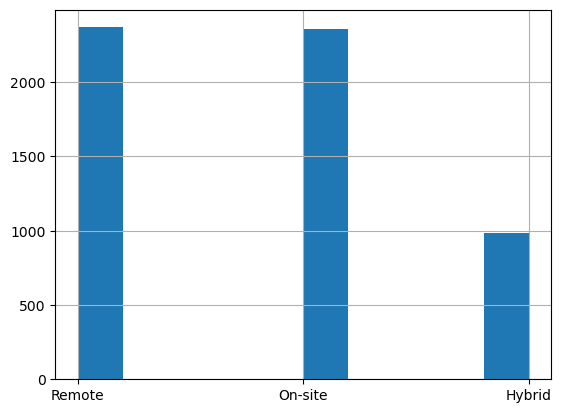

In [11]:
df['work_type'].hist()

In [12]:
# Calcular la cantidad total de valores no nulos en la columna ‘work_type’
total_no_nulos = df['work_type'].notnull().sum()

# Calcular la frecuencia de cada categoría en la columna ‘work_type’, excluyendo nulos
frecuencias = df['work_type'].value_counts()

# Calcular las probabilidades de cada categoría
probabilidades = frecuencias / total_no_nulos

# Mostrar las probabilidades calculadas
print("Probabilidades de cada categoría en 'work_type':")
print(probabilidades)

Probabilidades de cada categoría en 'work_type':
work_type
Remote     0.414886
On-site    0.412434
Hybrid     0.172680
Name: count, dtype: float64


In [13]:
# Identificar los índices de las filas donde la columna ‘work_type’ tiene valores nulos
indices_nulos = df[df['work_type'].isnull()].index

# Convertir el índice de probabilidades a una lista para usar en la asignación aleatoria (np.random.choice)
categorias = probabilidades.index.tolist()
probs = probabilidades.values.tolist()

In [14]:
# Generar valores aleatorios para los nulos, utilizando las probabilidades calculadas
valores_imputados = np.random.choice(categorias, size=len(indices_nulos), p=probs)

# Asignar los valores generados a los nulos en la columna ‘work_type’
df.loc[indices_nulos, 'work_type'] = valores_imputados

In [15]:
# Verificar que los valores nulos de la columna ‘work_type’ fueron satisfactoriamente imputados
df['work_type'].isnull().sum()
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote        40
no_of_employ           201
no_of_application     3284
posted_day_ago           6
alumni                2229
Hiring_person         1659
linkedin_followers    2285
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64

* **Variable `full_time_remote`**: Para iniciar el análisis de validarán la cantidad de valores (frecuencia) de cada uno.

In [16]:
conteo_valores = df['full_time_remote'].value_counts()
conteo_valores

full_time_remote
Full-time · Mid-Senior level    2875
Full-time                       1963
Full-time · Associate            380
Internship                       125
Full-time · Entry level          115
Contract · Mid-Senior level       81
Contract                          80
Part-time                         41
Full-time · Executive             33
Full-time · Director              24
Contract · Associate              24
Contract · Entry level            11
Internship · Internship            4
Temporary                          3
Full-time · Internship             3
Volunteer                          3
Part-time · Mid-Senior level       2
11-50 employees                    2
Internship · Entry level           2
Associate                          1
1-10 employees                     1
Part-time · Associate              1
Contract · Executive               1
Name: count, dtype: int64

In [17]:
df['full_time_remote'].isnull().sum()

40

Se observan valores similares en la columna `full_time_remote` con pequeñas variaciones, por lo tanto, para facilitar el análisis se agruparán en un número menor de categorías por medio de una función que las consolida. De igual manera se rellenarán los valores nulos.

In [18]:
# Función para consolidar las categorías en la columna 'full_time_remote'
def consolidate_category(value):
    if pd.isna(value):
        return value  # Retornar NaN tal cual para manejar después
    # Las categorías Associate, 
    if "Full-time" in value or "employees" in value or "Associate" in value:
        return "Full-time"
    elif "Contract" in value or "Temporary" in value:
        return "Contract"
    elif "Internship" in value:
        return "Internship"
    elif "Part-time" in value:
        return "Part-time"
    elif "Volunteer" in value:
        return "Volunteer"
    else:
        return "Other"  # Para cualquier otra categoría no especificada

In [19]:
# Aplicar la función para consolidar las categorías
df['full_time_remote'] = df['full_time_remote'].apply(consolidate_category)

# Calcular la categoría más común (moda)
most_common_category = df['full_time_remote'].mode()[0]

# Rellenar los valores nulos con la categoría más común
df['full_time_remote'].fillna(most_common_category, inplace=True)

# Verificar los cambios imprimiendo el conteo de valores actualizado
print("Conteo de valores únicos en la columna 'full_time_remote' después de consolidar y rellenar nulos:")
print(df['full_time_remote'].value_counts())

Conteo de valores únicos en la columna 'full_time_remote' después de consolidar y rellenar nulos:
full_time_remote
Full-time     5462
Contract       176
Internship     131
Part-time       43
Volunteer        3
Name: count, dtype: int64


In [20]:
# Filtrar el DataFrame para obtener filas donde 'full_time_remote' es 'Other'
other_jobs = df[df['full_time_remote'] == 'Other']

# Seleccionar la columna 'job_ID' de estas filas
other_job_ids = other_jobs['job_ID']

# Imprimir los valores de 'job_ID' para estas filas
print("Valores de 'job_ID' cuando 'full_time_remote' es 'Other':")
print(other_job_ids)

Valores de 'job_ID' cuando 'full_time_remote' es 'Other':
Series([], Name: job_ID, dtype: int64)


* **Variables `no_of_employ`**: Primero se hará limpieza de datos de la columna dado que se identificaron (por observación) valores no válidos para representar el número de empleados, lo cual puede interrumpir su análisis.

In [21]:
# Función para simplificar la columna 'no_of_employ' extrayendo solo el rango de empleados
def simplify_employee_range(entry):
    if pd.isna(entry):
        return None  # Manejo de valores NaN
    # Buscar y extraer solo el rango numérico de empleados usando una expresión regular
    match = re.search(r'\d{1,3}(?:,\d{3})*(?:\+)?(?=\s+employees)', entry)
    if match:
        # Remover comas y extraer número limpio
        return int(match.group(0).replace(',', '').replace('+', ''))
    return "Undefined"  # Etiqueta para entradas que no coincidan con el patrón

# Aplicar la función directamente sobre la columna 'no_of_employ' para reemplazar los valores in situ
df['no_of_employ'] = df['no_of_employ'].apply(simplify_employee_range)

# Ordenar los resultados numéricamente y mostrar el conteo de cada categoría simplificada
print(df['no_of_employ'].value_counts().sort_index())

no_of_employ
10.0        242
50.0        836
200.0       797
500.0       367
1000.0      281
5000.0     2073
10000.0     131
10001.0     887
Name: count, dtype: int64


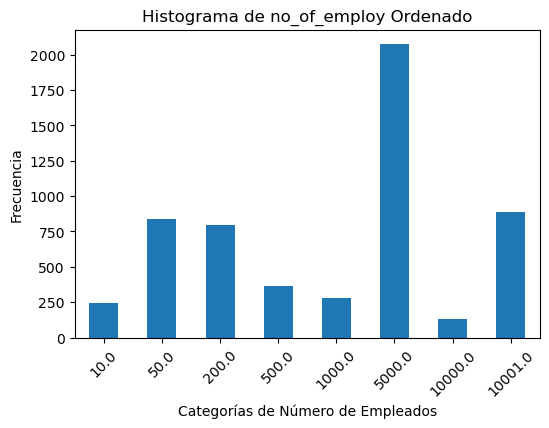

In [22]:
# Asegurarse de que los datos son numéricos y están ordenados
df['no_of_employ'] = pd.to_numeric(df['no_of_employ'], errors='coerce')  # Convertir a numérico, ignorando errores

# Ordenar los datos por número de empleados
sorted_counts = df['no_of_employ'].value_counts().sort_index()

# Crear el histograma con los datos ordenados
plt.figure(figsize=(6, 4))
sorted_counts.plot(kind='bar')
plt.title('Histograma de no_of_employ Ordenado')
plt.xlabel('Categorías de Número de Empleados')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5815 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5815 non-null   int64  
 1   job                 5815 non-null   object 
 2   location            5815 non-null   object 
 3   company_name        5815 non-null   object 
 4   work_type           5815 non-null   object 
 5   full_time_remote    5815 non-null   object 
 6   no_of_employ        5614 non-null   float64
 7   no_of_application   2531 non-null   float64
 8   posted_day_ago      5809 non-null   object 
 9   alumni              3586 non-null   object 
 10  Hiring_person       4156 non-null   object 
 11  linkedin_followers  3530 non-null   object 
 12  hiring_person_link  4156 non-null   object 
 13  job_details         5804 non-null   object 
 14  alumni_binary       5815 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 855.9+ KB


Al igual que con la variable `work_type`, **para los valores nulos de la columna `no_of_employ` asignaremos aleatoriamente una de las 7 categorías (graficadas en el histograma anterior)**. Dado que estos nulos son una pequeña fracción del conjunto de datos (201 en total), la asignación aleatoria basada en las probabilidades observadas de las otras categorías debería reflejar adecuadamente la distribución general sin complicar el proceso.

In [24]:
# Calcular la cantidad total de valores no nulos en la columna ‘no_of_employ’
total_no_nulos = df['no_of_employ'].notnull().sum()

# Calcular la frecuencia de cada categoría en la columna ‘no_of_employ’, excluyendo nulos
frecuencias = df['no_of_employ'].value_counts()

# Calcular las probabilidades de cada categoría
probabilidades = frecuencias / total_no_nulos

# Mostrar las probabilidades calculadas
print("Probabilidades de cada categoría en 'no_of_employ':")
print(probabilidades)

Probabilidades de cada categoría en 'no_of_employ':
no_of_employ
5000.0     0.369255
10001.0    0.157998
50.0       0.148913
200.0      0.141967
500.0      0.065372
1000.0     0.050053
10.0       0.043107
10000.0    0.023335
Name: count, dtype: float64


In [25]:
# Identificar los índices de las filas donde la columna ‘work_type’ tiene valores nulos
indices_nulos = df[df['no_of_employ'].isnull()].index

# Convertir el índice de probabilidades a una lista para usar en la asignación aleatoria (np.random.choice)
categorias = probabilidades.index.tolist()
probs = probabilidades.values.tolist()

In [26]:
# Generar valores aleatorios para los nulos, utilizando las probabilidades calculadas
valores_imputados = np.random.choice(categorias, size=len(indices_nulos), p=probs)

# Asignar los valores generados a los nulos en la columna ‘work_type’
df.loc[indices_nulos, 'no_of_employ'] = valores_imputados

In [27]:
# Verificar que los valores nulos de la columna ‘work_type’ fueron satisfactoriamente imputados
df['no_of_employ'].isnull().sum()
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ             0
no_of_application     3284
posted_day_ago           6
alumni                2229
Hiring_person         1659
linkedin_followers    2285
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64

In [28]:
# Validar que los valores nulos de la columna 'no_of_employ' fueron imputados satisfactoriamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5815 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5815 non-null   int64  
 1   job                 5815 non-null   object 
 2   location            5815 non-null   object 
 3   company_name        5815 non-null   object 
 4   work_type           5815 non-null   object 
 5   full_time_remote    5815 non-null   object 
 6   no_of_employ        5815 non-null   float64
 7   no_of_application   2531 non-null   float64
 8   posted_day_ago      5809 non-null   object 
 9   alumni              3586 non-null   object 
 10  Hiring_person       4156 non-null   object 
 11  linkedin_followers  3530 non-null   object 
 12  hiring_person_link  4156 non-null   object 
 13  job_details         5804 non-null   object 
 14  alumni_binary       5815 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 855.9+ KB


In [29]:
valores_unicos = df.nunique()

# Mostrar el número de valores únicos para cada columna
print(valores_unicos)

job_ID                5815
job                   2987
location               151
company_name          2494
work_type                3
full_time_remote         5
no_of_employ             8
no_of_application      191
posted_day_ago          91
alumni                 182
Hiring_person         2798
linkedin_followers    3009
hiring_person_link    2820
job_details           4556
alumni_binary            2
dtype: int64


## ESTA VARIABLE QUEDARÁ EL HOLD POR EL MOMENTO

* **Variables `no_of_application`**: Se imputan con la mediana porque es una buena medida de tendencia central que no es tan sensible a valores extremos como la media.

* **Variables `posted_day_ago`**: Para la columan de `posted_day_ago` se va a crear una función para convertir los valores de la medida de tiempo actual a minutos y estandarizar la medida en toda la columna. 

In [30]:
def convert_to_minutes(time_string):
    if pd.isna(time_string):
        return None 
    
    # Extraer el número y la unidad del tiempo utilizando expresiones regulares
    match = re.match(r'(\d+)\s*(second|minute|hour|day|week)s?', time_string)
    if not match:
        return None
    
    number, unit = int(match.group(1)), match.group(2)
    
    # Convertir a minutos según la unidad
    # Convertir segundos a minutos
    if 'second' == unit:
        return number / 60
    # Ya está en minutos
    elif 'minute' == unit:
        return number  
    # Convertir horas a minutos
    elif 'hour' == unit:
        return number * 60  
    elif 'day' == unit:
    # Convertir días a minutos
        return number * 1440  
    elif 'week' == unit:
    # Convertir semanas a minutos
        return number * 10080
    else:
        return None 

In [31]:
# Aplicar la función directamente sobre la columna 'posted_day_ago'
df['posted_day_ago'] = df['posted_day_ago'].apply(convert_to_minutes)

# Verificar los resultados como númericos
df['posted_day_ago'].describe()

count     5809.000000
mean      1709.595737
std       2309.036349
min          0.416667
25%        360.000000
50%        720.000000
75%       1440.000000
max      10080.000000
Name: posted_day_ago, dtype: float64

In [32]:
# Validar cuántos nulos quedan en la columna 'posted_day_ago'
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ             0
no_of_application     3284
posted_day_ago           6
alumni                2229
Hiring_person         1659
linkedin_followers    2285
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64

Se imputarán los datos nulos de la columna 'posted_day_ago' con la media dado que son únicamente 6 valores nulos.

In [33]:
# Calcular la media de la columna 'posted_day_ago'
mean_pda = df['posted_day_ago'].mean()

# Llenar los valores nulos en la columna 'posted_day_ago' con la media calculada
df['posted_day_ago'].fillna(mean_pda, inplace=True)

# Validar cuántos nulos quedan en la columna 'posted_day_ago'
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ             0
no_of_application     3284
posted_day_ago           0
alumni                2229
Hiring_person         1659
linkedin_followers    2285
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64

* **Variables `alumni`, y `linkedin_followers`**: Primero, ambas variables se convertirán en numéricas para su facilidad de tratamiento (imputación) y análisis. 
* La columna `alumni` se convertirá en numérica ignorando los valores nulos.
* La columna `linkedin_followers` se convertirá en numérica ignorando nulos y además sustituyendo los valores de texto (como por ejemplo *'Thiruvananthapuram, Kerala'*) en nulo/vacío dado que se asume que no son valores válidos para `linkedin_followers`.

*Nota: En LinkedIn, el término "company alumni" se refiere a individuos que anteriormente trabajaron para una organización y ahora forman parte de una red de ex empleados.*

In [34]:
# Validar antes de la modificación de la columna 'alumni' y 'linkedin_followers'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5815 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5815 non-null   int64  
 1   job                 5815 non-null   object 
 2   location            5815 non-null   object 
 3   company_name        5815 non-null   object 
 4   work_type           5815 non-null   object 
 5   full_time_remote    5815 non-null   object 
 6   no_of_employ        5815 non-null   float64
 7   no_of_application   2531 non-null   float64
 8   posted_day_ago      5815 non-null   float64
 9   alumni              3586 non-null   object 
 10  Hiring_person       4156 non-null   object 
 11  linkedin_followers  3530 non-null   object 
 12  hiring_person_link  4156 non-null   object 
 13  job_details         5804 non-null   object 
 14  alumni_binary       5815 non-null   int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 855.9+ KB


In [35]:
# Extraer valores numéricos y convertir la columna 'alumni' a numérica, 
# excluyendo nulos
df['alumni'] = df['alumni'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['alumni'] = pd.to_numeric(df['alumni'], errors='coerce')

# Extraer valores numéricos y convertir la columna 'linkedin_followers' a numérica, 
# excluyendo nulos y convirtiendo los valores de texto a vacío/nulo
df['linkedin_followers'] = df['linkedin_followers'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['linkedin_followers'] = pd.to_numeric(df['linkedin_followers'], errors='coerce')

# Validar cuántos nulos quedan en la columna 'posted_day_ago'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5815 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5815 non-null   int64  
 1   job                 5815 non-null   object 
 2   location            5815 non-null   object 
 3   company_name        5815 non-null   object 
 4   work_type           5815 non-null   object 
 5   full_time_remote    5815 non-null   object 
 6   no_of_employ        5815 non-null   float64
 7   no_of_application   2531 non-null   float64
 8   posted_day_ago      5815 non-null   float64
 9   alumni              3586 non-null   float64
 10  Hiring_person       4156 non-null   object 
 11  linkedin_followers  3505 non-null   float64
 12  hiring_person_link  4156 non-null   object 
 13  job_details         5804 non-null   object 
 14  alumni_binary       5815 non-null   int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 855.9+ KB


In [36]:
# Validar cuántos nulos quedan en la columna 'alumni' y 'linkedin_followers'
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ             0
no_of_application     3284
posted_day_ago           0
alumni                2229
Hiring_person         1659
linkedin_followers    2310
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64

Posteriormente, **los valores nulos de dichas columnas se pueden imputar con la mediana** para evitar la influencia de valores extremadamente altos que podrían distorsionar la media.

In [37]:
# Imputación de la mediana para 'alumni'
df['alumni'].fillna(df['alumni'].median(), inplace=True)

# Imputación de la mediana para 'linkedin_followers'
df['linkedin_followers'].fillna(df['linkedin_followers'].median(), inplace=True)

In [38]:
# Validar que no queden nulos en la columna 'alumni' y 'linkedin_followers'
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ             0
no_of_application     3284
posted_day_ago           0
alumni                   0
Hiring_person         1659
linkedin_followers       0
hiring_person_link    1659
job_details             11
alumni_binary            0
dtype: int64

* **Variables `Hiring_person`, `hiring_person_link`, y `job_details`:** Debido a que estas variables contienen información específica y única como nombres de personas, enlaces a perfiles de LinkedIn, y descripciones detalladas de puestos de trabajo, no es apropiado aplicar métodos estadísticos de imputación como la media o la mediana. Estas técnicas podrían generar datos que no reflejen la realidad de la información requerida. En lugar de esto, se opta por asignar el valor "*No definido*" en casos de datos faltantes. Esta elección garantiza que se mantenga la integridad y la especificidad de los datos, evitando la creación de enlaces o descripciones que podrían ser incorrectas o engañosas.

In [39]:
df['Hiring_person'].fillna('No definido', inplace=True)
df['hiring_person_link'].fillna('No definido', inplace=True)
df['job_details'].fillna('No definido', inplace=True)

# Validar que no queden nulos en las columnas que se imputaron
df.isnull().sum()

job_ID                   0
job                      0
location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ             0
no_of_application     3284
posted_day_ago           0
alumni                   0
Hiring_person            0
linkedin_followers       0
hiring_person_link       0
job_details              0
alumni_binary            0
dtype: int64

### Análisis de Reactivo 1.2. Tratamiento de Datos Faltantes e Inconsistentes

* El dataset `linkedin.csv` tenía gran volumen de data incorrecta o inconsistente, por lo que requirió múltiples métodos de tratamiento de datos, como por ejemplo:
    * Imputación por media
    * Imputación por mediana
    * Eliminación de filas y columnas vacías
    * Clasificación y limpieza de datos
    * Creación y reasignación de categorías
    * Transformación de datos categóricos a numéricos para facilidad de tratamiento

### 1.3. Codificación de variables categóricas 

### 1.4. Transformación de variables numéricas

### 1.5.  Escalamiento de variables

### 1.6. Discretización de variables

## 2.- Del dataframe obtenido realizar una clusterización mediante los algoritmos 

#### -  Kmeans++

#### -  Arboles de decisión

#### -  Clustering jerárquico. 

#### Gráficas y análisis de resultados.


### 3.- Finalmente, del conjunto de datos, identificar la o las variables de salida y las variables de entrada para entrenar algún algoritmo de ML (Arboles de desición, Regresiones lineales, etc… ), se requiere obtener un accuracy arriba del 80%, si el accuracy está por debajo de este valor, entonces será necesario repetir el punto 1.

#### Variable o variables de salida y de entrada que se usarán para entrenar al algoritmo de ML

#### código con el modelo de árbol de decisión

#### código con el modelo de regresión lineal 

#### Celda para calcular el score

In [40]:
#Drop de Column1 y Company_id ya que es una columna totalmente vacia, no tiene datos sólo el header
#df.drop('Column1', axis=1, inplace=True)
#df.drop('company_id', axis=1, inplace=True)

In [41]:
#df = pd.read_csv('linkedin.csv')

In [42]:
#df.head()

In [43]:
#categorias_principales = [
#    "Data Analyst", "Database Engineer", "Software Engineer", "Software Developer", 
#    "Project Manager", "Product Manager",
#    "Account Manager", "Sales Representative", "Data Scientist", "Business Analyst",
#    "Marketing Manager", "Graphic Designer", "UX/UI Designer", "Operations Manager",
#    "Financial Analyst", "Human Resources Manager", "Administrative Assistant",
 #   "Customer Service Representative", "Web Developer", "Network Engineer",
 #   "Systems Analyst", "Consultant", "Quality Assurance Engineer", "SEO Specialist"
#]

# Funcion para categorizar la columna 'job' en grupos
def categorizar_posicion(posicion):
    
    if isinstance(posicion, str):
        categoria, score = process.extractOne(posicion, categorias_principales)
        if score > 75:
            return categoria
        else:
            return "Otro"
    else:
        # Return 'Otro' or a specific category for missing/invalid data
        return "No especificado"

df['categoria'] = df['job'].apply(categorizar_posicion)
df.head()

df_nuevo = df
df_nuevo.head()

df.head()

df.to_csv('linkedin_categorizado.csv', index=False)

print(df['categoria'].unique())